In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import requests
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

CPU times: total: 4.53 s
Wall time: 24.7 s


In [2]:
data = pd.read_csv('FINAL_USO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [3]:
pd.set_option('display.max_columns',None)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,147311600,22317.27930,22339.86914,21792.19922,21792.19922,21792.19922,308420000,2.95,3.05,2.90,2.95,2.95,655100,1.1400,1.1370,1.1439,1.1350,1,50.47,53.49,54.66,50.36,76220,0,42.27,45.34,45.95,42.22,0,37541,37325,37600,37305,9460,1,2.736,2.826,2.826,2.733,0,788.40,791.85,798.3,788.30,0,1172.8,1163.40,1177.6,1157.9,1,2480,96.007,96.440,96.440,95.870,13930,0,20.700001,21.110001,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,218485400,21857.73047,22878.91992,21712.52930,22878.44922,22878.44922,433080000,3.00,3.05,2.90,3.00,3.00,746300,1.1353,1.1363,1.1423,1.1342,0,54.47,50.84,55.29,49.93,77000,1,46.39,43.09,46.78,42.34,1,38253,37607,38489,37574,19410,1,2.810,2.751,2.815,2.720,1,799.25,788.75,804.3,788.75,1,1190.1,1176.00,1191.0,1175.5,1,2480,96.568,96.100,96.650,96.020,15660,1,21.350000,21.400000,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,186267300,22629.06055,23138.89063,22267.41992,23138.82031,23138.82031,407940000,2.95,3.00,2.90,2.95,2.95,744000,1.1430,1.1353,1.1457,1.1349,1,52.16,54.65,54.67,51.94,102590,0,45.23,46.41,46.41,44.20,0,38690,38274,38783,38081,19650,1,2.774,2.803,2.806,2.733,0,795.50,799.40,802.2,785.10,0,1196.0,1190.05,1198.4,1181.5,1,2470,96.001,96.460,96.495,95.935,20520,0,20.840000,21.000000,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,153100200,23213.60938,23381.88086,22981.33008,23062.40039,23062.40039,336510000,2.85,2.95,2.85,2.90,2.90,1061100,1.1438,1.1429,1.1478,1.1424,1,52.20,53.44,53.80,51.60,17110,1,44.92,45.23,46.02,44.27,0,38706,38749,38880,38587,14200,1,2.716,2.768,2.781,2.713,0,790.25,795.60,800.5,787.75,0,1185.2,1196.00,1204.8,1179.5,0,2460,95.965,96.020,96.050,95.740,14170,0,20.889999,21.020000,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,249.919998,249.919998,144299400,23153.93945,23333.17969,23118.30078,23327.46094,23327.46094,288830000,2.77,2.95,2.73,2.88,2.88,1031800,1.1470,1.1443,1.1470,1.1421,1,53.80,53.00,54.82,52.66,109110,1,45.00,45.34,46.36,44.59,0,38821,38798,38877,38550,13780,1,2.686,2.730,2.745,2.679,0,801.40,795.95,802.8,793.10,1,1197.5,1185.20,1198.8,1183.6,1,0,95.735,95.965,96.070,95.585,16650,0,20.700001,21.129999,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [4]:
data.shape


(1718, 81)

In [5]:
data.size

139158

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

In [8]:
data.drop('Date',axis=1,inplace = True)

In [9]:
data.isnull().sum().tail(40)

SF_Price         0
SF_Open          0
SF_High          0
SF_Low           0
SF_Volume        0
SF_Trend         0
USB_Price        0
USB_Open         0
USB_High         0
USB_Low          0
USB_Trend        0
PLT_Price        0
PLT_Open         0
PLT_High         0
PLT_Low          0
PLT_Trend        0
PLD_Price        0
PLD_Open         0
PLD_High         0
PLD_Low          0
PLD_Trend        0
RHO_PRICE        0
USDI_Price       0
USDI_Open        0
USDI_High        0
USDI_Low         0
USDI_Volume      0
USDI_Trend       0
GDX_Open         0
GDX_High         0
GDX_Low          0
GDX_Close        0
GDX_Adj Close    0
GDX_Volume       0
USO_Open         0
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
dtype: int64

In [10]:
x = data.drop('USO_Adj Close',axis=1)
y = data['USO_Adj Close']

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_preds_lr = lr.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_lr))
print('MSE: ',mean_squared_error(y_test,y_preds_lr))
print('R2Score: ',r2_score(y_test,y_preds_lr)*100)

MAE:  3.411482982412138e-14
MSE:  1.5669735806083873e-27
R2Score:  100.0


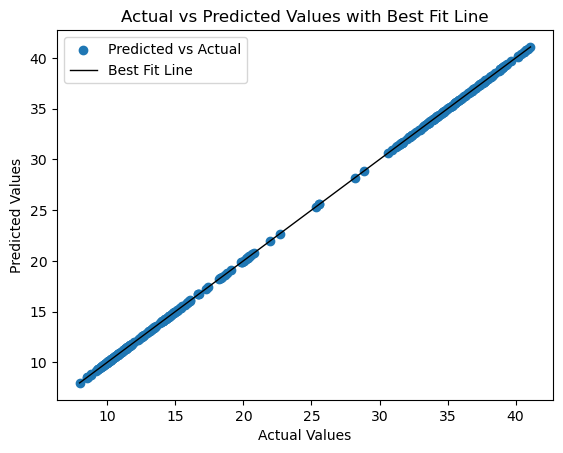

In [15]:
plt.scatter(y_test, y_preds_lr, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=1, label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line')
plt.legend()
plt.show()

In [16]:
%%time
Dt = DecisionTreeRegressor()
Dt.fit(x_train_scaled,y_train)
y_preds_dt = Dt.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_dt))
print('MSE: ',mean_squared_error(y_test,y_preds_dt))
print('R2Score: ',r2_score(y_test,y_preds_dt)*100)

MAE:  0.050930116279069695
MSE:  0.02518253912915117
R2Score:  99.98114166386951
CPU times: total: 156 ms
Wall time: 224 ms


In [17]:
%%time
Rf = RandomForestRegressor()
Rf.fit(x_train_scaled,y_train)
y_preds_rf = Rf.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_rf))
print('MSE: ',mean_squared_error(y_test,y_preds_rf))
print('R2Score: ',r2_score(y_test,y_preds_rf)*100)

MAE:  0.027265375726744576
MSE:  0.0036979485314014918
R2Score:  99.99723073372225
CPU times: total: 7.05 s
Wall time: 7.19 s


In [18]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train_scaled,y_train)
y_preds_svm = svm.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_svm))
print('MSE: ',mean_squared_error(y_test,y_preds_svm))
print('R2Score: ',r2_score(y_test,y_preds_svm)*100)

MAE:  0.04732901790285545
MSE:  0.003917693637328946
R2Score:  99.99706617418164
CPU times: total: 672 ms
Wall time: 719 ms


In [19]:
%%time
knn = KNeighborsRegressor()
knn.fit(x_train_scaled,y_train)
y_preds_knn = knn.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_knn))
print('MSE: ',mean_squared_error(y_test,y_preds_knn))
print('R2Score: ',r2_score(y_test,y_preds_knn)*100)

MAE:  0.7809360093023258
MSE:  1.0463649442520546
R2Score:  99.21641333573771
CPU times: total: 250 ms
Wall time: 606 ms


In [20]:
for i in range(1,22):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    y_preds_knn = knn.predict(x_test_scaled)
#     print('MAE: ',mean_absolute_error(y_test,y_preds_knn))
#     print('MSE: ',mean_squared_error(y_test,y_preds_knn))
    print('R2Score: ',r2_score(y_test,y_preds_knn)*100)

R2Score:  98.85174445390268
R2Score:  99.00912706009532
R2Score:  99.1576962722058
R2Score:  99.24853356928874
R2Score:  99.21641333573771
R2Score:  99.22109135896045
R2Score:  99.17764366432661
R2Score:  99.18506656252445
R2Score:  99.17568256935299
R2Score:  99.16470907392129
R2Score:  99.16308557454441
R2Score:  99.17426346591644
R2Score:  99.16566421109718
R2Score:  99.13909690602986
R2Score:  99.12226954306209
R2Score:  99.11923874986951
R2Score:  99.10605869550083
R2Score:  99.09908250894019
R2Score:  99.08341901438902
R2Score:  99.07553629953088
R2Score:  99.0492189577827
